### Evaluate the Quality of Cloned Voice, will longer audio length produce better result?


In [19]:
import librosa
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

In [20]:
# 1. Naturalness
# Load the sample speech and generated speech

def score(sample_speech, generated_speech):
    sample_speech, sr = librosa.load(sample_speech)
    generated_speech, sr = librosa.load(generated_speech)
    min_length = min(len(sample_speech), len(generated_speech))
    sample_speech = sample_speech[:min_length]
    generated_speech = generated_speech[:min_length]

    mel_sample = librosa.feature.melspectrogram(y=sample_speech, sr=sr)
    mel_generated = librosa.feature.melspectrogram(y=generated_speech, sr=sr)
    mel_distortion = mean_squared_error(mel_sample, mel_generated)
    print(f"Mel-cepstral distortion (lower is better): {mel_distortion:.4f}")
    return mel_distortion

In [21]:
score("voice_samples/steven/10.wav","voice_samples/zoe/10.wav")

Mel-cepstral distortion (lower is better): 294.5884


294.58838

In [22]:
from generate_cloned_voice import generate_cloned_voice

In [23]:
text = "True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed."
naturalness_various_input_audio_length_steven = []
naturalness_various_input_audio_length_zoe = []
naturalness_various_input_audio_length_jeff = []
naturalness_various_input_audio_length_yingqi = []

audiolist_steven = ["voice_samples/steven/10.wav", "voice_samples/steven/16.wav", "voice_samples/steven/18.wav", "voice_samples/steven/19.wav",
                    "voice_samples/steven/35.wav", "voice_samples/steven/106.wav"] 
audiolist_zoe = ["voice_samples/zoe/10.wav", "voice_samples/zoe/13.wav", "voice_samples/zoe/18.wav", "voice_samples/zoe/21.wav",
                 "voice_samples/zoe/33.wav", "voice_samples/zoe/117.wav"]
audiolist_jeff = ["voice_samples/jeff/10.wav", "voice_samples/jeff/15.wav", "voice_samples/jeff/19.wav", "voice_samples/jeff/22.wav",
                  "voice_samples/jeff/34.wav","voice_samples/jeff/104.wav"]
audiolist_yingqi = ["voice_samples/yingqi/10.wav","voice_samples/yingqi/14.wav", "voice_samples/yingqi/16.wav", "voice_samples/yingqi/21.wav",
                    "voice_samples/yingqi/33.wav", "voice_samples/yingqi/121.wav"]

audio_lengths_steven = [10,16,18,19,35,106]
audio_lengths_zoe = [10,13,18,21,33,117]
audio_lengths_jeff = [10,15,19,22,34,104]
audio_lengths_yingqi = [10,14,16,21,33,121]

score(audiolist_steven[0], "outputs/output_en_default.wav")

def naturalness_for_audiolst(text,scorelst, audiolst):
    sample_speech= audiolst[0]
    for audio in audiolst:
        generate_cloned_voice(audio,text)
        naturalness = score(sample_speech, "outputs/output_en_default.wav")
        scorelst.append(naturalness)
    print(scorelst)    
    return scorelst

Mel-cepstral distortion (lower is better): 154.0769


In [24]:
naturalness_for_audiolst(text,naturalness_various_input_audio_length_steven,audiolist_steven)
naturalness_for_audiolst(text,naturalness_various_input_audio_length_jeff,audiolist_jeff)
naturalness_for_audiolst(text,naturalness_various_input_audio_length_yingqi,audiolist_yingqi)
naturalness_for_audiolst(text,naturalness_various_input_audio_length_zoe,audiolist_zoe)

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 123.8079


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 129.6228


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 115.2747


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 112.0884


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 124.7269


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 109.8062
[123.80794, 129.62279, 115.27475, 112.08842, 124.72689, 109.80621]


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 9.152)]
after vad: dur = 9.152
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 13.0912


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.206, 15.0613125)]
after vad: dur = 14.855
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 13.8155


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.8613125)]
after vad: dur = 19.861
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 23.2169


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.238, 22.9546875)]
after vad: dur = 22.716
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 22.3659


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.078, 34.304)]
after vad: dur = 34.226
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 11.7393


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 62.674), (62.798, 104.384)]
after vad: dur = 104.26
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 22.7371
[13.091171, 13.815471, 23.216948, 22.365873, 11.739342, 22.737095]


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.0906875)]
after vad: dur = 10.09
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 101.2665


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.298)]
after vad: dur = 13.298
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 83.0111


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 15.9146875)]
after vad: dur = 15.914
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 85.2053


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 20.21)]
after vad: dur = 20.21
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 89.0241


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 32.658), (32.75, 33.5146875)]
after vad: dur = 33.422
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 92.3661


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 30.162), (30.19, 58.418), (58.734, 102.098), (102.254, 106.29), (106.638, 120.6186875)]
after vad: dur = 119.77
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 80.2072
[101.26655, 83.01107, 85.20529, 89.024086, 92.36605, 80.20718]


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 251.7688


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 245.8550


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 249.9093


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 262.5681


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 251.4819


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
True leadership means empowering others. It's about inspiring people to achieve their full potential and creating an environment where everyone can succeed.
 > ===========================
tɹu ˈlidəɹˌʃɪp minz ɪmˈpaʊəɹɪŋ ˈəðəɹz. ɪts əˈbaʊt ˌɪnˈspaɪəɹɪŋ ˈpipəɫ tɪ əˈtʃiv ðɛɹ fʊɫ pəˈtɛnʃəɫ ənd kɹiˈeɪtɪŋ ən ɪnˈvaɪɹənmənt wɛɹ ˈɛvɹiˌwən kən səkˈsid.
 length:155
 length:155
Cloned Voice Generated!
Mel-cepstral distortion (lower is better): 253.5357
[251.76881, 245.85497, 249.9093, 262.5681, 251.48193, 253.53566]


[251.76881, 245.85497, 249.9093, 262.5681, 251.48193, 253.53566]

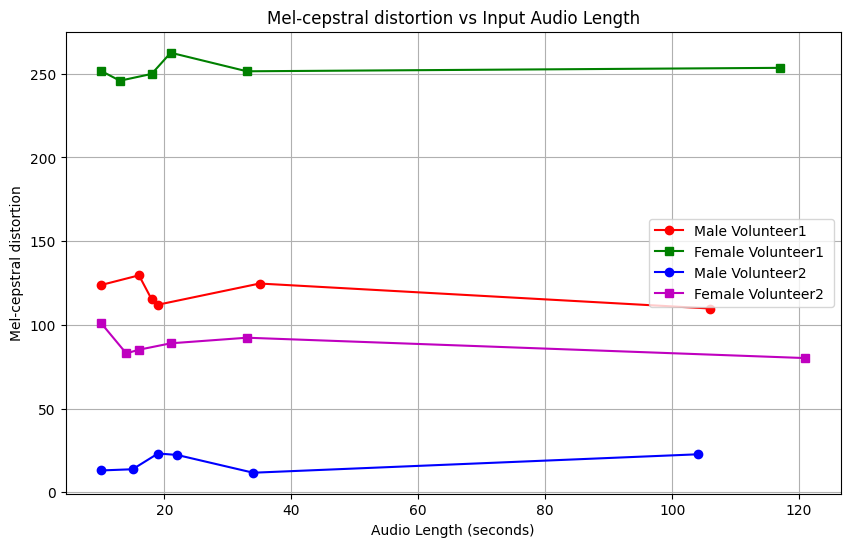

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(audio_lengths_steven, naturalness_various_input_audio_length_steven, marker='o', label='Male Volunteer1', color='r')
plt.plot(audio_lengths_zoe, naturalness_various_input_audio_length_zoe, marker='s', label='Female Volunteer1 ', color='g')
plt.plot(audio_lengths_jeff, naturalness_various_input_audio_length_jeff, marker='o', label='Male Volunteer2', color='b')
plt.plot(audio_lengths_yingqi, naturalness_various_input_audio_length_yingqi, marker='s', label='Female Volunteer2 ', color='m')

plt.xlabel('Audio Length (seconds)')
plt.ylabel('Mel-cepstral distortion')
plt.title('Mel-cepstral distortion vs Input Audio Length')
plt.legend()
plt.grid(True)
plt.show()